In [159]:
import tweepy
import time

from AppCred import CONSUMER_KEY, CONSUMER_SECRET
from AppCred import ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 4s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
import numpy as np

In [6]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1
        return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [16]:
model.compile(optimizer ='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [18]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs = 20, 
                    batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6931 - acc: 0.5039 - val_loss: 0.6933 - val_acc: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6930 - acc: 0.5081 - val_loss: 0.6933 - val_acc: 0.4948
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6932 - acc: 0.5004 - val_loss: 0.6933 - val_acc: 0.4948
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6931 - acc: 0.5054 - val_loss: 0.6933 - val_acc: 0.4948
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6932 - acc: 0.4952 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6931 - acc: 0.5047 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 8/20
30/30 [==============================] - 0s 17ms/step - loss: 0.6931 - a

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
import matplotlib.pyplot as plt

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len (history_dict['acc']) + 1)

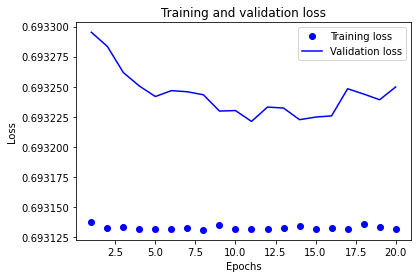

In [24]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title ('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel ('Loss')
plt.legend()

plt.show()

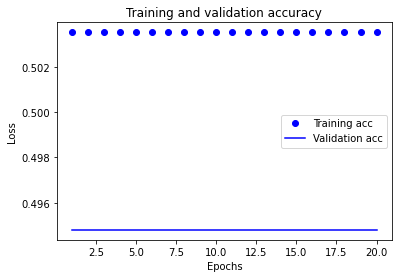

In [25]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel ('Loss')
plt.legend()

plt.show()


In [29]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy', 
             metrics= ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

reults = model.evaluate (x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 14ms/step - loss: 0.6932 - accuracy: 0.5027
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5027
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5028
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000: 0s - loss: 0


In [31]:
reults

[0.6931527256965637, 0.4999600052833557]

In [32]:
model.predict(x_test)

array([[0.54588544],
       [0.49880227],
       [0.49880227],
       ...,
       [0.49880227],
       [0.49880227],
       [0.49880227]], dtype=float32)

In [33]:
from keras.datasets import boston_housing

In [34]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [35]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [43]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu',
                          input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss ='mse', metrics = ['mae'])
    return model


In [56]:
k = 4

num_val_samples = len(train_data)//k
num_epochs = 100
mae_scores = []

In [58]:
for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i *num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) *num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
    train_targets[(i+1)*num_val_samples:]],
    axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
             epochs = num_epochs, batch_size = 1, verbose = 0)
    #val_mse, val_mae = model.evaluate (val_data, val_targets, verbose = 0)
    #all_scores.append(val_mae)
    mae_history = history.history['val_mean_absolute_error']
    mae_scores.append(mae_history)
    

    
    

Processing fold # 0


KeyError: 'val_mean_absolute_error'

# BREAK

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_excel('WindWatchOrg_snowball_user_sample.xlsx')
len(df)

52076

In [5]:
print(len(df.followed_by.unique()))

windwatch = df[df.followed_by == 'windwatchorg']

len(windwatch)

234


1054

In [6]:
windwatch = windwatch[(windwatch.description.str.contains('(?i)Wind') == True) | 
                     (windwatch.username.str.contains('(?i)Wind') == True)]

usernames = windwatch.username.unique()

In [11]:
print (usernames)

['savourshoreline' 'SaveLeinster' 'county_wind' 'WindTaskForce'
 'VeraKrug12' 'windfarmrefugee' 'wind_impact' 'maighnewindfarm'
 'gegenwind_sh' 'GegenwindNORD' 'GegenwindLohrha' 'windwahn' 'AktivistBi'
 'GegenwindBW' 'LeitrimA' 'geengoyerwind' 'ommzk' 'FountainStop'
 'StopSanquhar2' 'WindEwijkNee' 'krwig1' 'NH_WindWatch' 'DerWindkraftsk1'
 'BWindAware' 'InnogyIE' 'innogyireland' 'M_V_A_T' 'notoderryadd'
 'BiGegenwind' 'WINDLOCKEDLLC' 'Karajavuori' 'Gegenwind_OR'
 'GegenwindUStein' 'HaagseWW' 'stoplandwind' 'alabamawind' 'IRL_illwind'
 'View4Tomorrow' 'ajmarciniak1' 'Weidewind' 'NEEWindmolens1'
 'schipbeekwind' 'HARVESTtheTRUTH' 'BIFrischerGege1' 'Don_Quichot_030'
 'windvernunft_ki' 'VERNUNFTKRAFTBB' 'BI_Borchen' 'jtwindaction'
 'agir19320' 'SIPLF' 'No_Wind_Farm' 'WindWatch_FIN' 'GaysAgainstWind'
 'RockAgainstWind' 'IrelandWALeague' 'tippwindaware' 'stopwindenergy'
 'SteunTegenwind' 'windmolensWFnee' 'philiphunt13' 'PortlawTurbines'
 'GeenWindmolens' 'de_rixt' 'NOIrasburgWind' 'SaveOntS

In [123]:
#initiate df
tweet_df = pd.DataFrame()
tweet_df

""


In [160]:
# get selection of tweets from user time lines that are followed by windwatch and have wind either in username or description
#while loop trying to get tweets from users
temp = []
while True:
    #try code, expect error to occur
    try:
        #loop through list of usernames 
        for i in range(len(usernames)):

            #tweepy cursor object to get full user_timeline
            for tweet in tweepy.Cursor(api.user_timeline, id = usernames[i], tweet_mode = 'extended').items():
            #Expect to hit rate limit: set to sleep
                #get username
                username = tweet._json['user']['screen_name']

                #get user id
                user_id = tweet._json['user']['id']

                #get tweet
                tweets = tweet._json['full_text']

                #get time of tweet
                timestamp = tweet._json['created_at']
                #get tweet id
                tweet_id = tweet._json['id']

                #dict of info, which gets stored in global list 
                data = {'username': username, 'user_id': user_id, 'tweet': tweets, 'timestamp': timestamp, 'tweet_id':tweet_id}                
                temp.append(data)
    
    #pause for 15 min before resuming after getting error(don't even think it's a rate limit thing, but just in case if it is)
    except BaseException as e:
        print('Failed on_status,',str(e)) # print the error code obtained from twitter
        time.sleep(60*15) # provide a time before resuming the code when an error arises
        print('Trying again')
    continue

Failed on_status, Failed to send request: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connec

KeyboardInterrupt: 

In [162]:
temp[-1]

{'username': 'VeraKrug12',
 'user_id': 845750863578742785,
 'tweet': 'https://t.co/tAxh5TTH1u',
 'timestamp': 'Thu Feb 28 22:06:32 +0000 2019',
 'tweet_id': 1101242274195881984}

In [164]:
tweet_df = pd.DataFrame(temp)

In [170]:
tweet_df.username.unique()

array(['savourshoreline', 'SaveLeinster', 'county_wind', 'WindTaskForce',
       'VeraKrug12'], dtype=object)

In [ ]:
#another attempt
new = []
while True:
    #try code, expect error to occur
    try:
        #loop through list of usernames 
        for i in range(len(usernames)):

            #tweepy cursor object to get full user_timeline
            for tweet in tweepy.Cursor(api.user_timeline, id = usernames[i], tweet_mode = 'extended').items():
            #Expect to hit rate limit: set to sleep
                #get username
                username = tweet._json['user']['screen_name']

                #get user id
                user_id = tweet._json['user']['id']

                #get tweet
                tweets = tweet._json['full_text']

                #get time of tweet
                timestamp = tweet._json['created_at']
                #get tweet id
                tweet_id = tweet._json['id']

                #dict of info, which gets stored in global list 
                data = {'username': username, 'user_id': user_id, 'tweet': tweets, 'timestamp': timestamp, 'tweet_id':tweet_id}                
                new.append(data)
    
    #pause for 5 sec before resuming after getting error(don't even think it's a rate limit thing, but just in case if it is)
    except BaseException as e:
        print('Failed on_status,',str(e)) # print the error code obtained from twitter
        time.sleep(5) # provide a time before resuming the code when an error arises
        print('Trying again')
    continue

Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))
Trying again
Failed on_status, Failed to send request: ('Connection aborted.', ConnectionResetError(54, 'Connec

In [ ]:
new